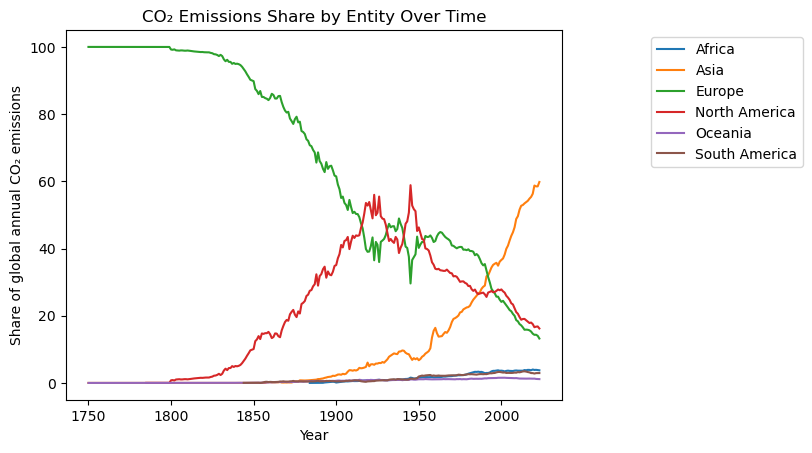

In [15]:
import pandas as pd 
# Ler a base de dados
df_co2 = pd.read_csv("annual-share-of-co2-emissions.csv")

import matplotlib.pyplot as plt

# Plot lines separated by the 'Entity' column
for entity in ["Africa", "Asia", "Europe", "North America", "Oceania", "South America"]:
    # Filter data for each entity and plot
    entity_data = df_co2[df_co2['Entity'] == entity]
    plt.plot(entity_data['Year'], entity_data['Share of global annual CO₂ emissions'], label=entity)

plt.xlabel('Year')
plt.ylabel('Share of global annual CO₂ emissions')
plt.title('CO₂ Emissions Share by Entity Over Time')
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
plt.show()


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


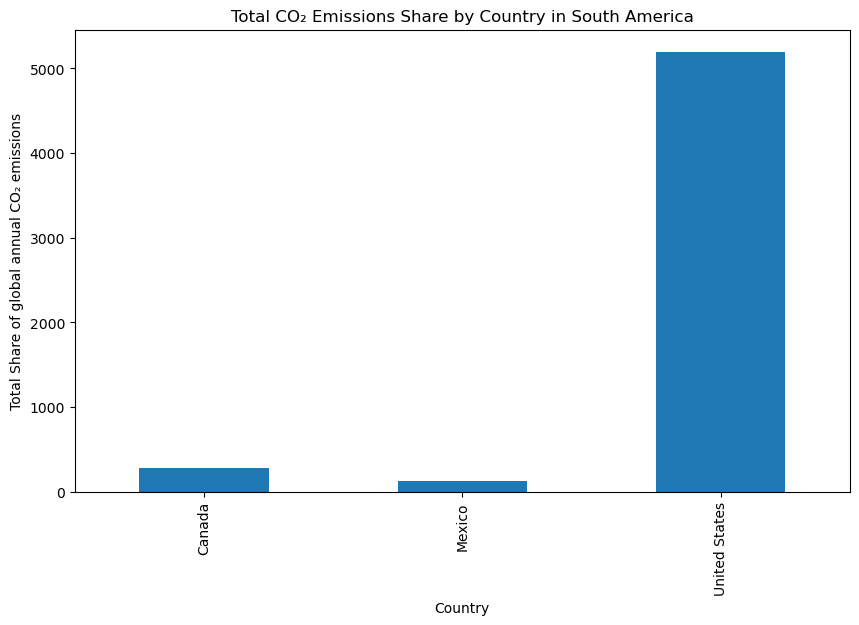

In [21]:
# Install missing packages
%pip install pandas matplotlib

import pandas as pd 
# Ler a base de dados
df_co2 = pd.read_csv("annual-share-of-co2-emissions.csv")

import matplotlib.pyplot as plt
# Filter data for South America and plot a bar chart for each country
south_america_countries = ['United States','Canada','Mexico']
south_america_data = df_co2[df_co2['Entity'].isin(south_america_countries)]

south_america_data.groupby('Entity')['Share of global annual CO₂ emissions'].sum().plot(kind='bar', figsize=(10, 6))
plt.xlabel('Country')
plt.ylabel('Total Share of global annual CO₂ emissions')
plt.title('Total CO₂ Emissions Share by Country in South America')
plt.show()

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


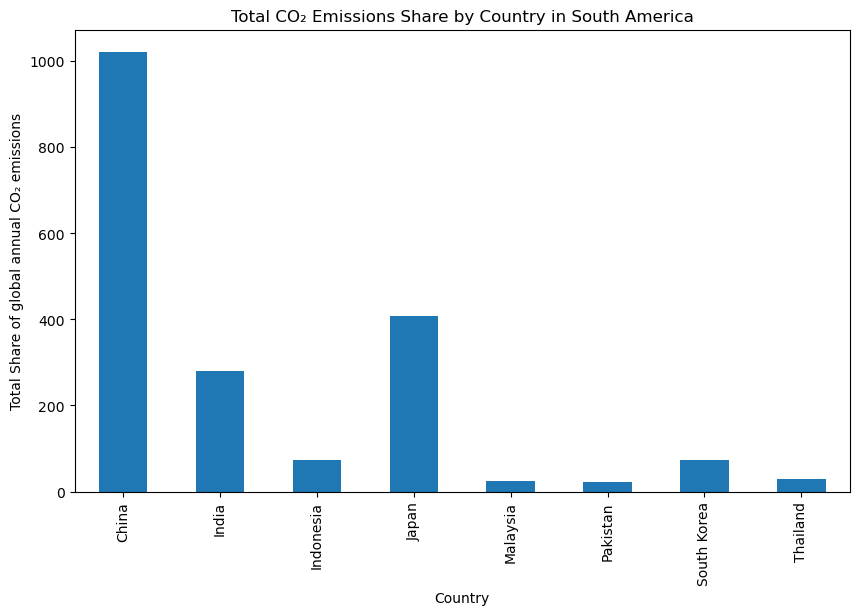

In [29]:
# Install missing packages
%pip install pandas matplotlib

import pandas as pd 
# Ler a base de dados
df_co2 = pd.read_csv("annual-share-of-co2-emissions.csv")

import matplotlib.pyplot as plt
# Filter data for South America and plot a bar chart for each country
south_america_countries = ['China','India','Japan','South Korea','Indonesia','tawain','Thailand','Malaysia','Pakistan']
south_america_data = df_co2[df_co2['Entity'].isin(south_america_countries)]

south_america_data.groupby('Entity')['Share of global annual CO₂ emissions'].sum().plot(kind='bar', figsize=(10, 6))
plt.xlabel('Country')
plt.ylabel('Total Share of global annual CO₂ emissions')
plt.title('Total CO₂ Emissions Share by Country in South America')
plt.show()

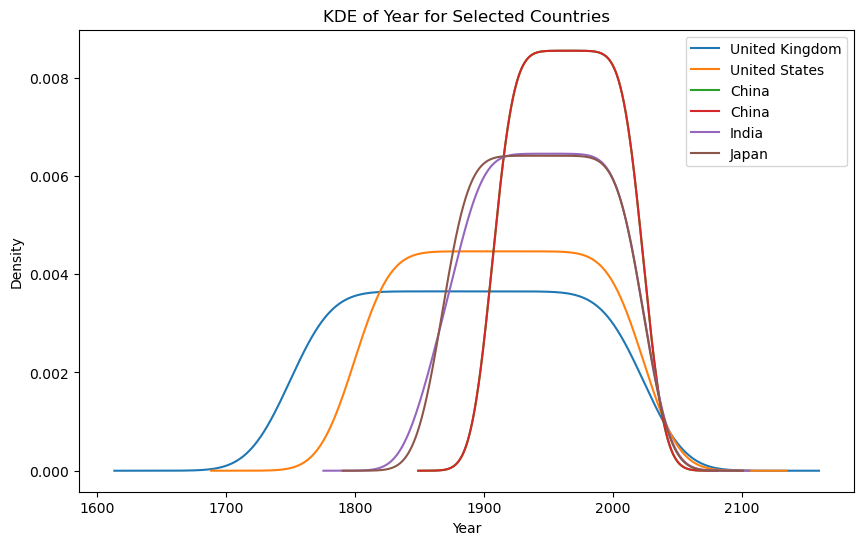

In [31]:
# Filtrar os dados para os países Inglaterra, Estados Unidos e China
selected_countries = ['United Kingdom', 'United States', 'China','China','India','Japan']
selected_data = df_co2[df_co2['Entity'].isin(selected_countries)]

# Criar o gráfico KDE para cada país
plt.figure(figsize=(10, 6))
for country in selected_countries:
    country_data = selected_data[selected_data['Entity'] == country]
    country_data['Year'].plot.kde(label=country)

plt.xlabel('Year')
plt.ylabel('Density')
plt.title('KDE of Year for Selected Countries')
plt.legend()
plt.show()

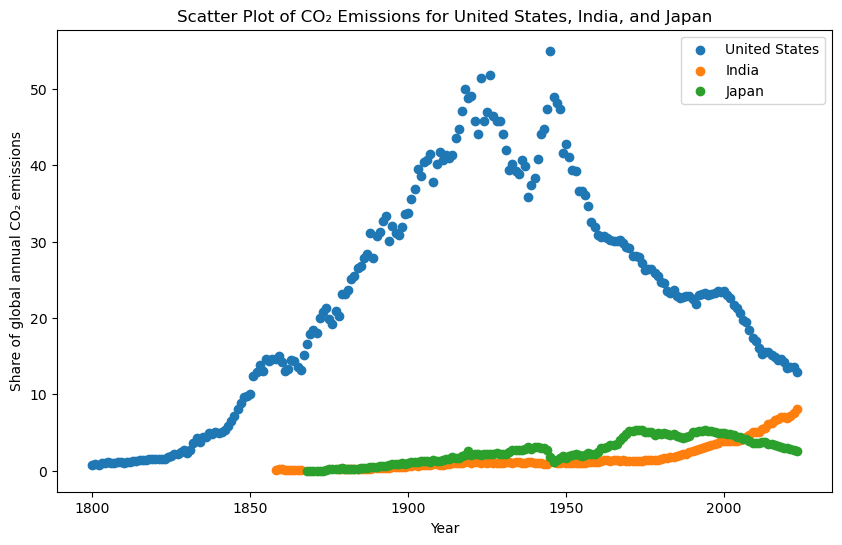

In [32]:
# Filtrar os dados para os países Estados Unidos, Índia e Japão
scatter_countries = ['United States', 'India', 'Japan']
scatter_data = df_co2[df_co2['Entity'].isin(scatter_countries)]

# Criar o gráfico de dispersão
plt.figure(figsize=(10, 6))
for country in scatter_countries:
    country_data = scatter_data[scatter_data['Entity'] == country]
    plt.scatter(country_data['Year'], country_data['Share of global annual CO₂ emissions'], label=country)

plt.xlabel('Year')
plt.ylabel('Share of global annual CO₂ emissions')
plt.title('Scatter Plot of CO₂ Emissions for United States, India, and Japan')
plt.legend()
plt.show()

In [ ]:
import seaborn as sns

# Pivot the dataframe to have countries/entities as rows, years as columns, and emission share as values
heatmap_data = df_co2.pivot_table(
    index='Entity',
    columns='Year',
    values='Share of global annual CO₂ emissions',
    aggfunc='sum'
)

plt.figure(figsize=(18, 10))
sns.heatmap(heatmap_data, cmap='YlOrRd', linewidths=0.1)
plt.title('Heatmap das Intensidades de Emissão de CO₂ por País/Região e Ano')
plt.xlabel('Ano')
plt.ylabel('País/Região')
plt.tight_layout()
plt.show()

In [11]:
df_co2

,Entity,Code,Year,Share of global annual CO₂ emissions
0,Afghanistan,AFG,1949,0.000282
1,Afghanistan,AFG,1950,0.001421
2,Afghanistan,AFG,1951,0.001435
3,Afghanistan,AFG,1952,0.001416
4,Afghanistan,AFG,1953,0.001598
...,...,...,...,...
27323,Zimbabwe,ZWE,2019,0.027660
27324,Zimbabwe,ZWE,2020,0.024183
27325,Zimbabwe,ZWE,2021,0.027584
27326,Zimbabwe,ZWE,2022,0.027954
